In [1]:
from numpy import pi, log
import pypolychord
from pypolychord.priors import UniformPrior
try:
    from mpi4py import MPI
except ImportError:
    pass

Define a four-dimensional spherical gaussian likelihood,
 width sigma=0.1, centered on the 0 with one derived parameter.
 The derived parameter is the squared radius

In [15]:
nDims = 4
nDerived = 1
sigma = 0.1

def likelihood(theta):
    """ Simple Gaussian Likelihood"""

    nDims = len(theta)
    r2 = sum(theta**2)
    logL = -log(2*pi*sigma*sigma)*nDims/2.0
    logL += -r2/(2*sigma*sigma)

    return logL, [r2]

Define a box uniform prior from -1 to 1

In [16]:
def prior(hypercube):
    """ Uniform prior from [-1,1]^D. """
    return UniformPrior(-1, 1)(hypercube)

Optional dumper function giving run-time read access to
 the live points, dead points, weights and evidences

In [17]:
def dumper(live, dead, logweights, logZ, logZerr):
    print("Last dead point:", dead[-1])

Parameter names

In [18]:
#! This is a list of tuples (label, latex)
#! Derived parameters should be followed by a *

paramnames = [(f'p{i}', f'\\theta_{i}') for i in range(nDims)]
paramnames += [('r*', 'r')]

Run PolyChord

In [19]:
output = pypolychord.run(
    likelihood,
    nDims,
    nDerived=nDerived,
    prior=prior,
    dumper=dumper,
    file_root='gaussian',
    nlive=200,
    do_clustering=True,
    read_resume=False,
    paramnames=paramnames,
)

PolyChord: MPI is already initilised, not initialising, and will not finalize

PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.22.1
  release: 10th Jan 2024
    email: wh260@mrao.cam.ac.uk

Run Settings
nlive    :     200
nDims    :       4
nDerived :       1
Doing Clustering
Synchronous parallelisation
Generating equally weighted posteriors
Generating weighted posteriors
Clustering on posteriors
Writing a resume file to chains/gaussian.resume

generating live points


all live points generated

Speed  1 =  0.113E-04 seconds
number of repeats:           20
started sampling

Last dead point: [  0.30611021   0.52340161  -0.79144853  -0.33025888   1.1031144
 -58.86295876 -49.621134  ]
_________________
lives      | 200 |
phantoms   |2462 |
posteriors | 201 |
equals     |   6 |
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
ncluster   =       1 /       1
ndead      =                 201
nposterior =                 201
nequals    =                   8
nlik

Make an anesthetic plot

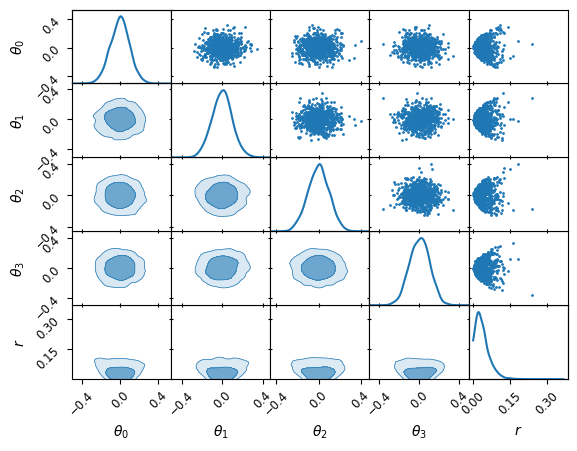

In [20]:
try:
    from anesthetic import make_2d_axes
    fig, ax = make_2d_axes(['p0', 'p1', 'p2', 'p3', 'r'])
    output.plot_2d(ax)
    fig.savefig('posterior.pdf')
except ImportError:
    print("Install anesthetic for plotting examples.")